In [6]:
import pandas as pd
import numpy as np

# Create a DataFrame with your data
data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40','<=30','31....40','31....40','>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium','medium','medium','high','medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes','yes','no','yes','no'],
    'credit_rating': ['fair', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'excellent', 'fair', 'fair', 'fair','excellent','excellent','fair','excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes','yes','yes','yes','no']
}

df = pd.DataFrame(data)
df



,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,fair,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,excellent,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [7]:
def entropy(data):
    counts = data.value_counts() / len(data)
    entropy = -np.sum(counts * np.log2(counts))
    return entropy

# Calculate entropy before splitting for 'buys_computer'
entropy_before_split = entropy(df['buys_computer'])

# Function to calculate Information Gain
def information_gain(target, feature):
    total_entropy = entropy(target)
    values = feature.unique()
    weighted_entropy = 0
    for value in values:
        subset_indices = feature.index[feature == value]
        subset_target = target[subset_indices]
        weighted_entropy += (len(subset_target) / len(target)) * entropy(subset_target)
    return total_entropy - weighted_entropy

# Calculate Information Gain for each feature
information_gains = {}
target = df['buys_computer']
for feature_name in df.columns[:-1]:  # Exclude the target column
    feature = df[feature_name]
    information_gains[feature_name] = information_gain(target, feature)

# Identify the feature with the highest Information Gain as the root node
root_node = max(information_gains, key=information_gains.get)

print(f"Entropy (buys_computer): {entropy_before_split:.2f}")
print("Information Gains:")
for feature, ig in information_gains.items():
    print(f"{feature}: {ig:.2f}")

print(f"The first feature for the decision tree is: {root_node}")

Entropy (buys_computer): 0.94
Information Gains:
age: 0.25
income: 0.03
student: 0.15
credit_rating: 0.00
The first feature for the decision tree is: age


In [8]:
#A2
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Separate the target variable ('buys_computer')
Tr_X = df.drop(columns=['buys_computer'])
Tr_y = df['buys_computer']

# Step 1: Load your training data into pandas DataFrames Tr_X and Tr_y
# Assuming you have Tr_X and Tr_y as your training data

# Step 2: Create an instance of the DecisionTreeClassifier
model = DecisionTreeClassifier()

# Step 3: Fit the model to the training data
model.fit(Tr_X, Tr_y)



# Step 5: Get the depth of the constructed tree
tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 4


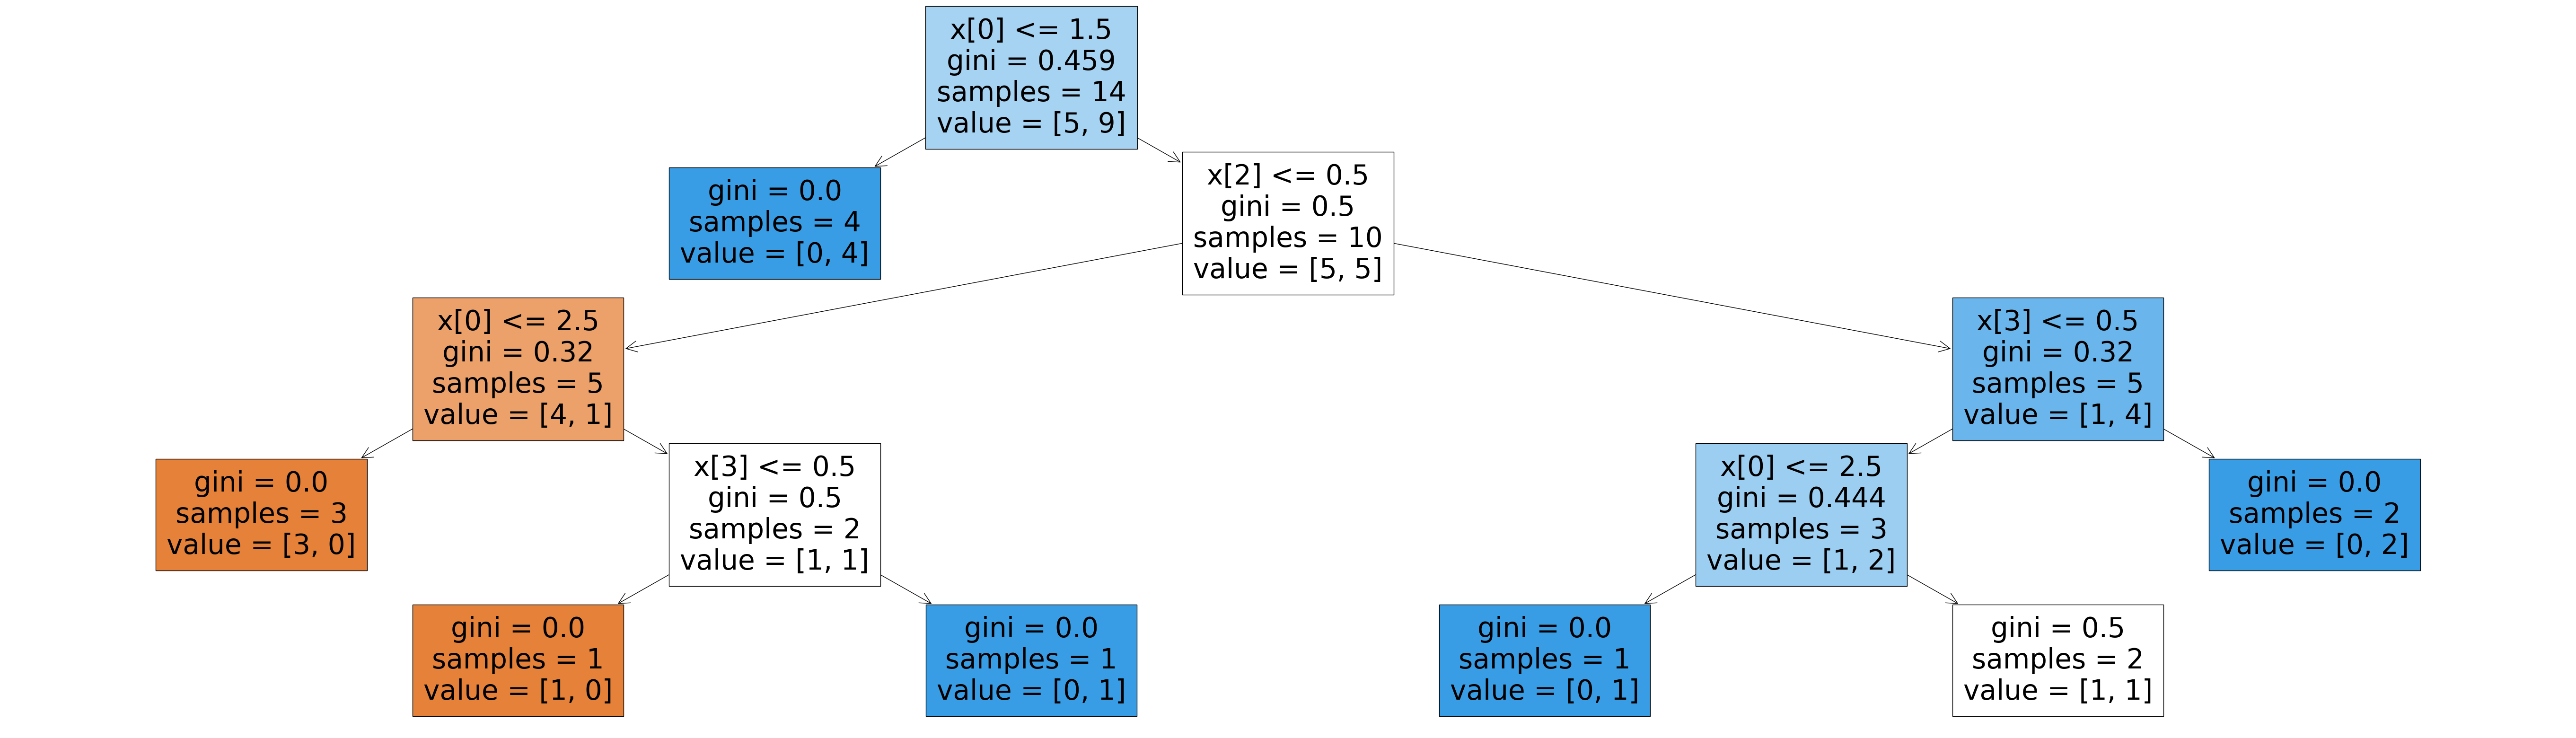

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set the figure size to adjust the plot dimensions
plt.figure(figsize=(70, 20))

# Use the plot_tree function to visualize the Decision Tree
plot_tree(model, filled=True)

# Show the plot
plt.show()


Training Set Accuracy: 1.0
Tree Depth: 4


Training Set Accuracy: 1.00
Test Set Accuracy: 0.38


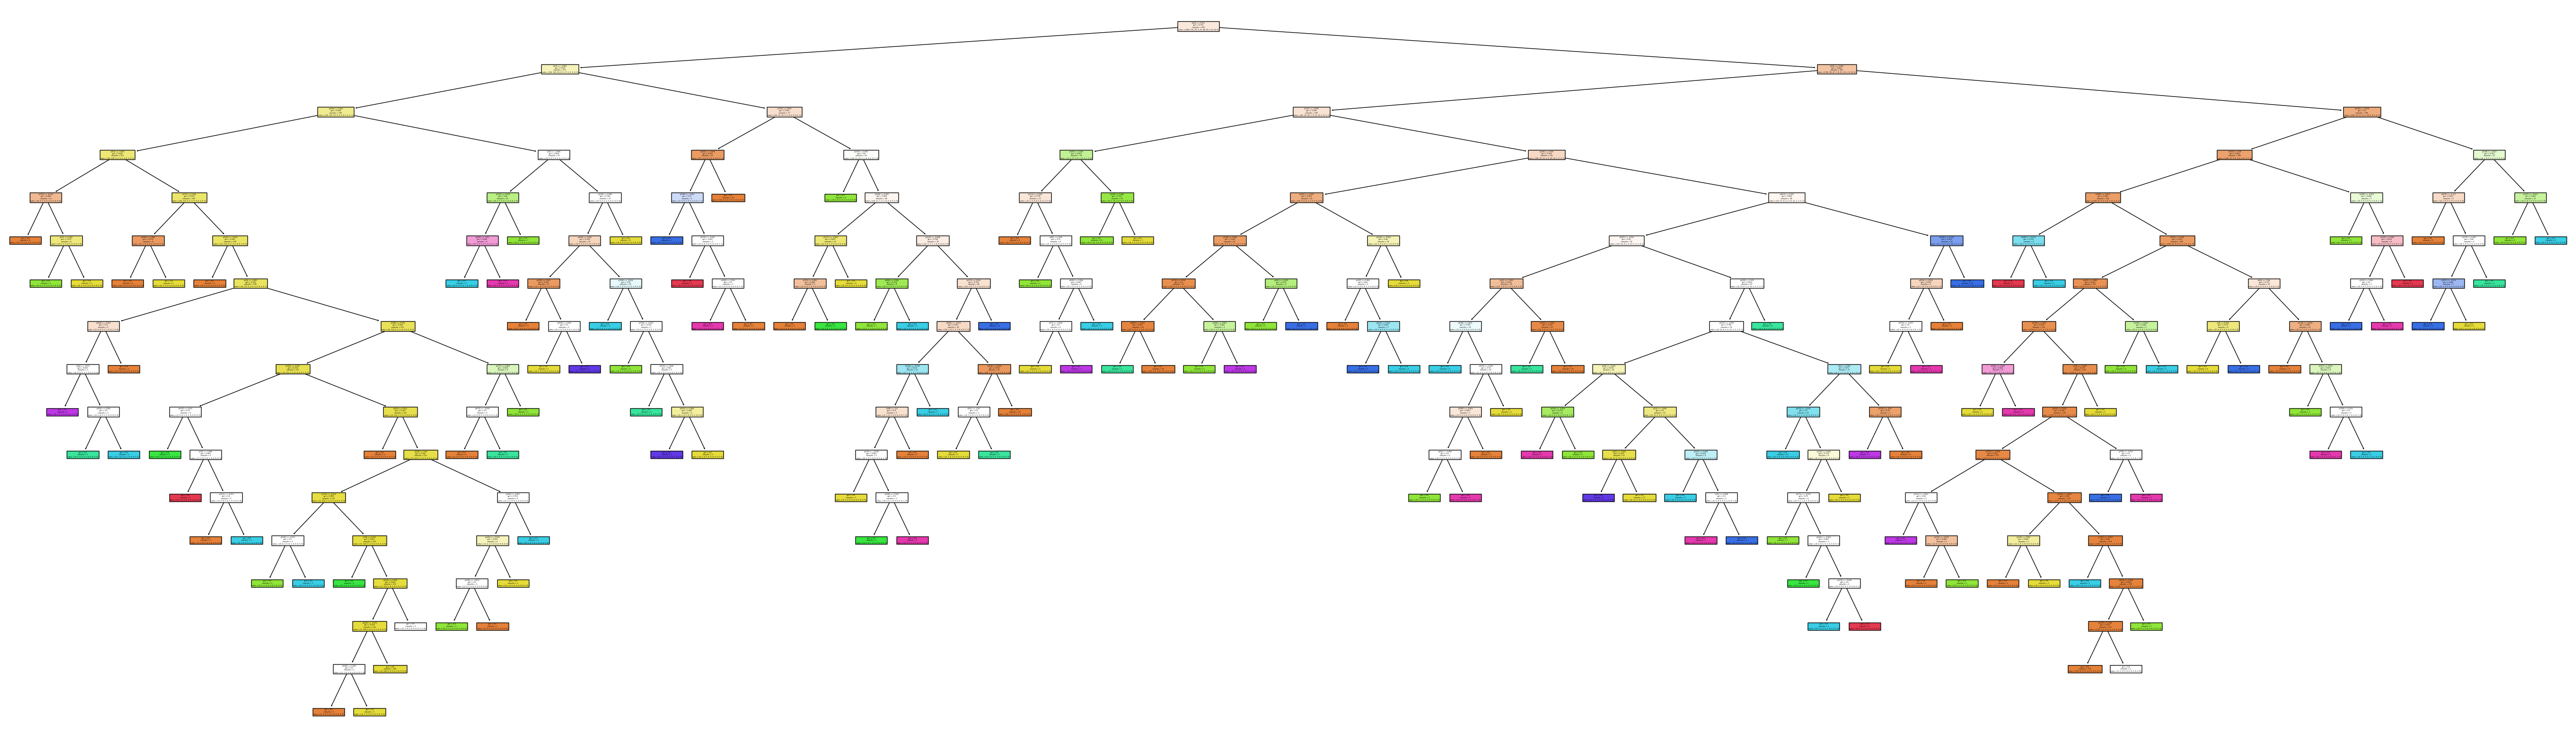

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
data1 = pd.read_csv('lab2output.csv')
X = data1.iloc[:, :-1]
y = data1.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model1 = DecisionTreeClassifier()

model1.fit(X_train, y_train)

training_accuracy = model1.score(X_train, y_train)
print(f"Training Set Accuracy: {training_accuracy:.2f}")

test_accuracy = model1.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.2f}")

plt.figure(figsize=(70, 20))
plot_tree(model1, filled=True)
plt.show()

Training Set Accuracy (Entropy Criterion): 1.00
Test Set Accuracy (Entropy Criterion): 0.40


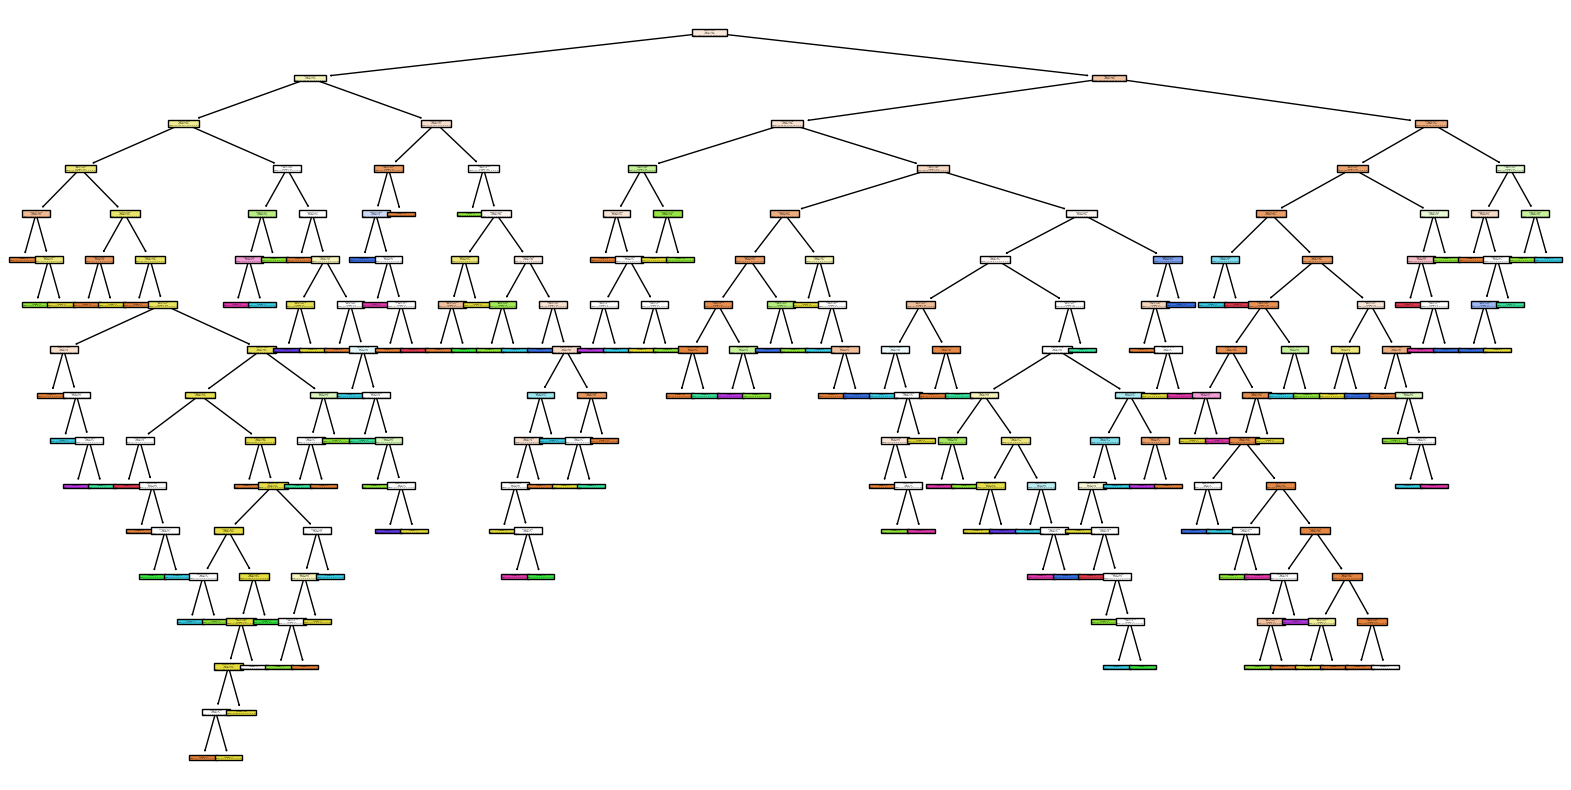

In [11]:
model2 = DecisionTreeClassifier(criterion="entropy")

model.fit(X_train, y_train)

training_accuracy = model.score(X_train, y_train)
print(f"Training Set Accuracy (Entropy Criterion): {training_accuracy:.2f}")

test_accuracy = model.score(X_test, y_test)
print(f"Test Set Accuracy (Entropy Criterion): {test_accuracy:.2f}")

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True)
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Create a Random Forest Classifier model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Make predictions with both models
decision_tree_predictions = model1.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

# Calculate performance metrics for Decision Tree
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_precision = precision_score(y_test, decision_tree_predictions, average='weighted')
decision_tree_recall = recall_score(y_test, decision_tree_predictions, average='weighted')
decision_tree_f1_score = f1_score(y_test, decision_tree_predictions, average='weighted')

# Calculate performance metrics for Random Forest
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions, average='weighted')
random_forest_recall = recall_score(y_test, random_forest_predictions, average='weighted')
random_forest_f1_score = f1_score(y_test, random_forest_predictions, average='weighted')

# Compare performance metrics
print("Decision Tree Performance Metrics:")
print(f"Accuracy: {decision_tree_accuracy:.2f}")
print(f"Precision: {decision_tree_precision:.2f}")
print(f"Recall: {decision_tree_recall:.2f}")
print(f"F1-Score: {decision_tree_f1_score:.2f}")

print("\nRandom Forest Performance Metrics:")
print(f"Accuracy: {random_forest_accuracy:.2f}")
print(f"Precision: {random_forest_precision:.2f}")
print(f"Recall: {random_forest_recall:.2f}")
print(f"F1-Score: {random_forest_f1_score:.2f}")

Decision Tree Performance Metrics:
Accuracy: 0.38
Precision: 0.36
Recall: 0.38
F1-Score: 0.37

Random Forest Performance Metrics:
Accuracy: 0.59
Precision: 0.54
Recall: 0.59
F1-Score: 0.51


D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
